In [ ]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/StellarEvolutionWithGaia/gaia_M45-result.csv
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/StellarEvolutionWithGaia/gaia_NGC-2360-result.csv
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/Projects/StellarEvolutionWithGaia/gaia_NGC-2682-result.csv

!git clone https://github.com/psheehan/CIERA-HS-Program.git
!mv CIERA-HS-Program/Projects/StellarEvolution/modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS .
!rm -rf CIERA-HS-Program/
"""

# $\textit{Stellar Evolution - The dynamic lives of stars!} $
### Project Lead: Kyle Akira Rocha

#### I want this lesson to be an opportunity for you to think creatively. This is not supposed to be a test of how much you know.  I want you to be currious and try to answer the questions even if you don't know the answers. The point is not for you to struggle in silence, however. If something is unclear or you have questions please ask me or other students! 


Overview:
 - Exercise 1 - Exploring GAIA Data
     - Using GAIA data
     - Performing "data cuts" to find clusters
     - Plotting a CMD
 - Exercise 2 - MIST models
     - Using MIST models
     - Stellar evolution theory
     - Identifying evolutionary stages
     - HR Diagram
 - Summary


----------

## Exercise 1: Exploring GAIA Data

In this exercise we will be looking at data from the **Pleiades** taken by the GAIA space observatory! Please watch [this video](https://www.youtube.com/watch?v=oGri4YNggoc&feature=emb_rel_end) to learn more [*20 min*] about GAIA.
<br>
<br>
The point of this section is to investigate the data and think creativly! You are not expected to know the answers to all the questions at the end of this section. I would like you to pretend you are the first person researching stars and try to understand why they look and behave the way they do.
<br>
<br>
__(a.) Load in the data `gaia_M45-result.csv` and print out the columns.__

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

gaia_m45_data = pd.read_csv("gaia_M45-result.csv", delimiter = "," )
gaia_m45_data.columns

# gaia_m45_data = np.genfromtxt( , dtype=float, delimiter=",",names=True)
# gaia_m45_data.dtype.names

Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmdec', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp', 'radial_velocity',
       'radial_velocity_error', 'phot_variable_flag', 'teff_val', 'a_g_val',
       'radius_val', 'lum_val'],
      dtype='object')

Our data set is not a complete list of objects GAIA can see but has been cut to minmize the number of sources with high errors or qualities that make analysis challenging (e.g. high extinction, variability). Some important attributes we will be interested in include the following:
- `ra` - Right ascension
- `dec` - Declination
- `parallax` - The *apparent* motion of stars (relative to distant, unmoving stars) caused by our changing viewing angle as we move around the sun. Large [parallax](https://en.wikipedia.org/wiki/Parallax) means the star is close. [mas]
- `phot_g_mean_mag` - aparent G-band mean [magnitude (how bright a star appears)](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) 
- `phot_bp_mean_mag` - Integrated BP band mean magnitude
- `phot_rp_mean_mag` - Integrated RP band mean magnitude
- `pmra` - Proper motion in RA [km/s] 
- `decra` - Proper motion in DEC [km/s] 

Below is a series of observations taken 5 years apart that show Barnard's Star as it moves relative to other unmoving stars in the background. This is due to the intrinsic motion of the star relative to the center of mass of our solar system which we call proper motion. In order to calculate proper motion you must subtract out the motion of the satelite as it orbits the sun in order to see if the star is actually moving across the sky.

![ProperMotion](https://upload.wikimedia.org/wikipedia/commons/6/6c/Barnard2005.gif "Proper Motion Example")


<br>
<br>


__(b.) Add a scatter plot to visualize the sources in this data set. Use the "ra" and "dec" as x and y axes. Change the size of the points and or their alpha until you can properly see all the stars. To get a sense of scale, the gray circle is about the angular size of the moon on the sky.__


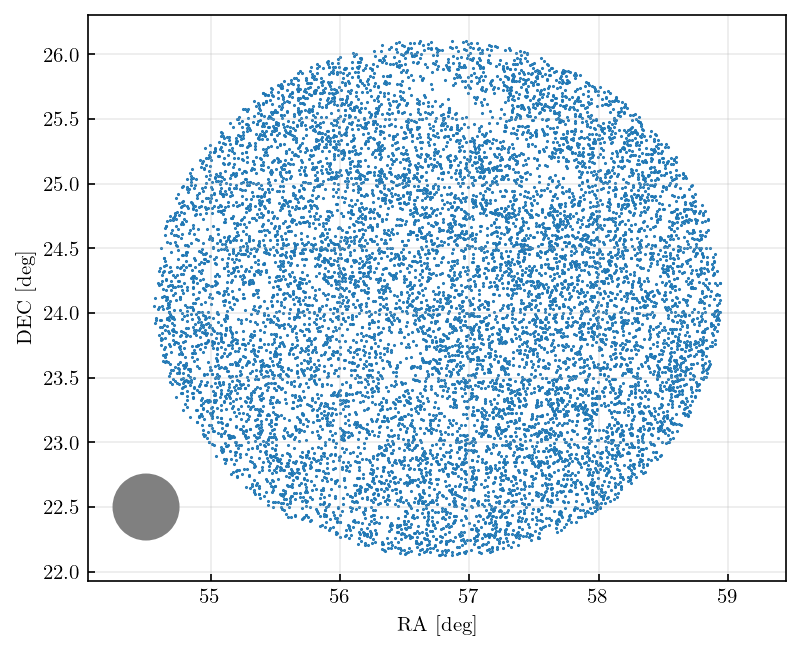

In [5]:
%matplotlib inline
plt.figure(figsize=(6,5),dpi=150)

# Your scatter plot here!
plt.scatter(gaia_m45_data["ra"], gaia_m45_data["dec"], marker=".", s=1)

plt.axis("equal")
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
plt.grid(alpha = 0.25, zorder=1)
ax = plt.gca()
ax.add_artist( plt.Circle((54.5,22.5),radius=0.518/2,facecolor="gray", zorder=2) )
plt.show()

<br>

The Pleiades is an open cluster meaning it is comprised of a few thousand gravitationaly bound stars that *all formed out of the same molecular cloud at roughly the same time*. Open clusters are a great tool for studing stellar evolution because of these properties. Open clusters are loosley bound and can become disrupted over their lifetime through interactions with other clusters or giant molecular clouds. Open clusters tend to contain younger stars because they can easily be disrupted before aging significantly.

<br>
<br>

Note that not all of the stars in our data are part of the Pleiades! Other stars happen to be in our line of sight and may be closer or further than the Pleiades. In order to isolate the stars we want to study, we will look at their distances and proper motions. We know that the stars in the Pleiades should all be around the same distance and have similar proper motions (born from the same molecular cloud). We also know that the distance to the Pleiades is about 136 parsecs away. Below is the relation between distance $d$ in parsecs and the parallax angle $\omega$ in arcseconds.

### $$ d = 1 / \omega $$

<br>

__(c.) Make a figure with two plots: a histogram of the parallax and a scatter plot of the RA and DEC proper motions of each star. Locate the cluster of stars in your data using the plots and information given above. You can make a cut in parallax or proper motion or both to indentify the stars. Identify in your plot, which stars you are selecting to be in the cluster (e.g. change of color). Share your plots with others and how you identified the cluster stars.__

__Note: you will need to change the axes of the proper motion plot to zoom in and find the cluster. You can use `%matplotlib notebook` to make this easier.__


<IPython.core.display.Javascript object>


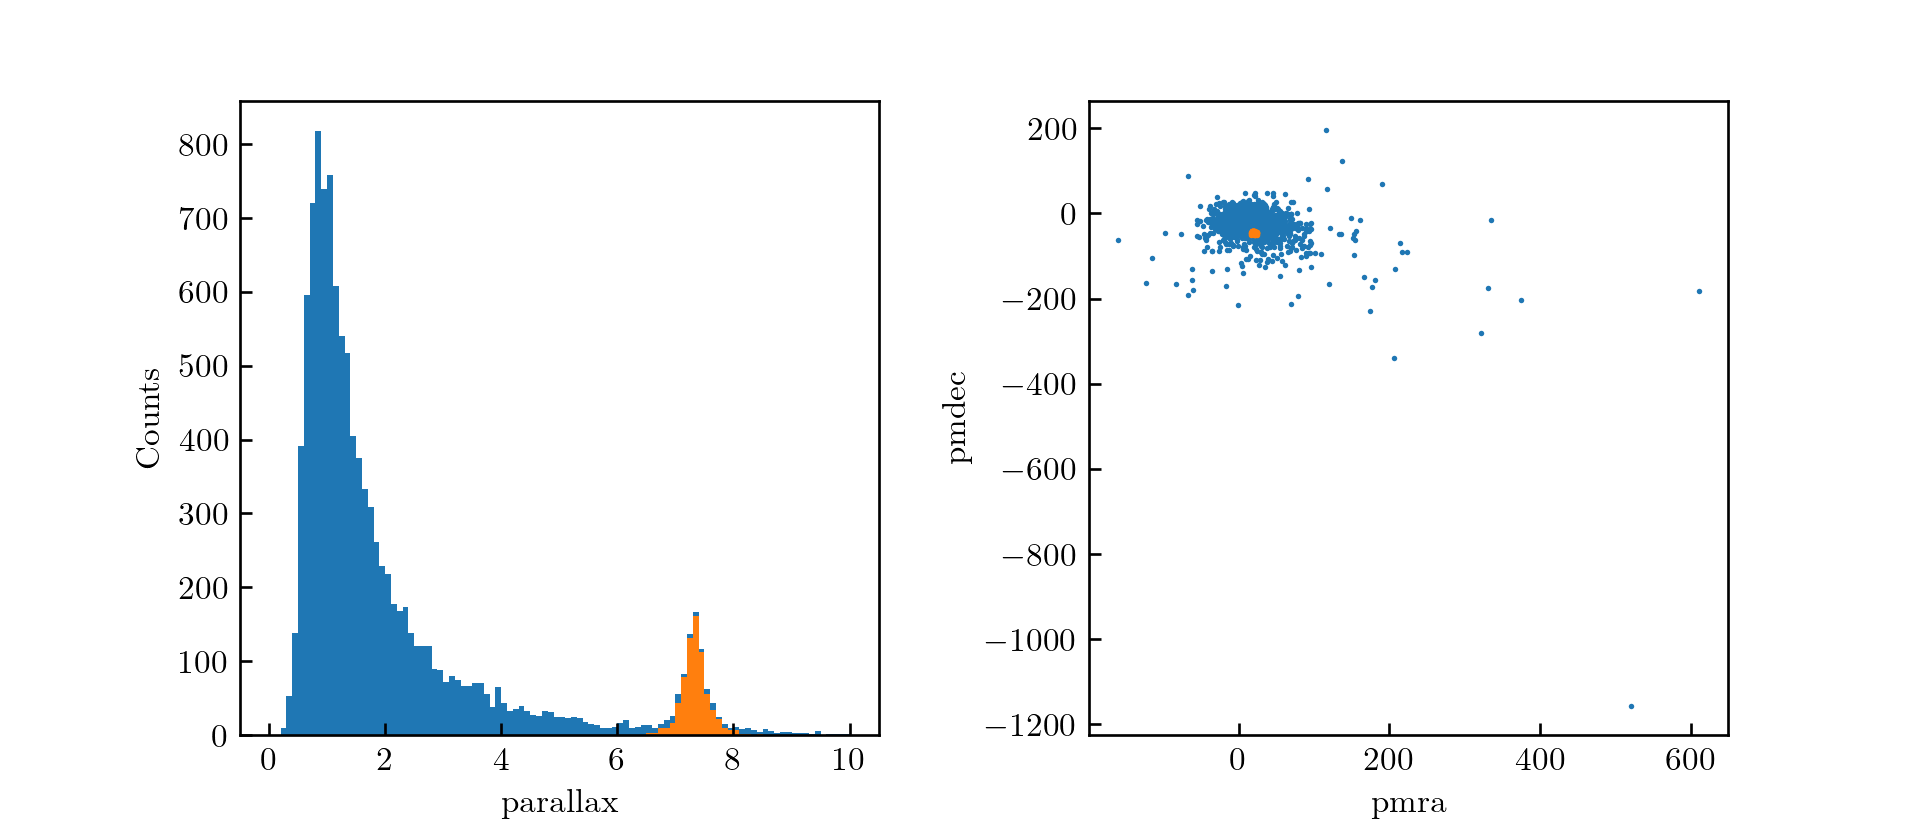

In [54]:
%matplotlib inline
%matplotlib notebook

import numpy

fig, subs = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), dpi=120)

pleiades_par = numpy.logical_and(6.5 < gaia_m45_data["parallax"], gaia_m45_data["parallax"] < 8.5)
pleiades_pmra = numpy.logical_and(15 < gaia_m45_data["pmra"], gaia_m45_data["pmra"] < 25)
pleiades_pmdec = numpy.logical_and(-50 < gaia_m45_data["pmdec"], gaia_m45_data["pmdec"] < -40)

pleiades = numpy.logical_and(pleiades_par, pleiades_pmra)
pleiades = numpy.logical_and(pleiades, pleiades_pmdec)

subs[0].hist(gaia_m45_data["parallax"], bins=100, range=(0,10) )
subs[0].hist(gaia_m45_data["parallax"][pleiades], bins=100, range=(0,10))

subs[0].set_xlabel("parallax")
subs[0].set_ylabel("Counts")

subs[1].scatter(gaia_m45_data["pmra"], gaia_m45_data["pmdec"], s=0.4 )
subs[1].scatter(gaia_m45_data["pmra"][pleiades], gaia_m45_data["pmdec"][pleiades], s=0.4)

subs[1].set_xlabel("pmra")
subs[1].set_ylabel("pmdec")

fig.subplots_adjust(wspace=0.33)
plt.show()

<IPython.core.display.Javascript object>


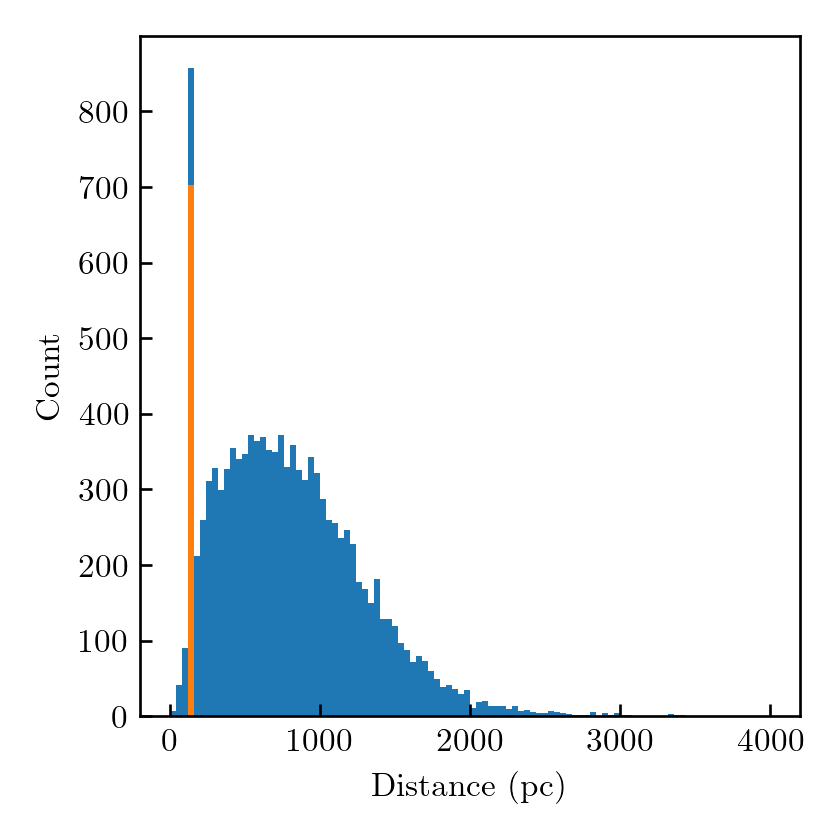

In [39]:
# A histogram of distance also helps

distance = 1./(gaia_m45_data["parallax"]*1e-3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.hist(distance, bins=100, range=(0,4000))
ax.hist(distance[pleiades], bins=100, range=(0,4000))

ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Count")

fig.tight_layout()

plt.show()

<br>
Now that you know which stars are in the Pleiades we can take a closter look at trends in the data. The next plot we will look at compares a star's brightness in the G band to its "color". From an observer's perspective, stars have different brightnesses based on both the star's individual properties and their distance to the observer. An intrinsically bright star may apear dim if it is far away and a dim star may apear bright up close. In order to break this degeneracy, we can calculate the absolute magnitude ($M$) of a star to quantify its true brightness using the aparent magnitude ($m$) and parallax ($\omega$). The equation relating absolute magnitude and aparent magnitude is given below ($\omega_{mas} = $ parallax in milli arcseconds):

## $$ M = m - 5 \log_{10}\left(d_{\rm pc}\right) + 5$$

<div class="alert alert-info" role="alert">
<strong>Bonus</strong>: The above equation can be reduced to what is shown below. Derive the equation and verify that this is correct.
</div>

## $$ M = m - 5 \log_{10}\left( 1e2 / \omega_{mas} \right) $$


If you have ever looked at stars through a telescope you may have been able to tell that some stars have different colors than others. They may range from red to yellow to white to blue. This color is a real property of stars and has something to do with how hot the star is. This is essentially what you will be using as the x-axis of your plots by taking the difference between the BP and RP bands (G_bp - G_rp). Small values if thus difference are bluer and large values are redder. The image below is of the globular cluster NGC 1898! Notice the varied colors and brightnesses of the immense number of stars!

![ngc1898](https://www.nasa.gov/sites/default/files/thumbnails/image/potw1840a.jpg)

<br>

__(d.) First complete the function `get_absolute_mag` to calculate the absolute magnitude using the aparent magnitude (`phot_g_mean_mag`) measured by GAIA and the parallax. Then calculate the color of each star by taking the difference between the BP and RP bands (G_bp - G_rp).__

__Make a figure with two scatter plots of the absolute magnitude as a function of color as y and x axes respectively. One plot should have the stars you have identified as inside the cluster and the other plot contains the rest of the stars.__

__Note:You will need to invert the y axis for magnitude. Because we are astronomers we have made the magnitude scale such that negative numbers are brighter and positive numbers are dimmer.__


<IPython.core.display.Javascript object>


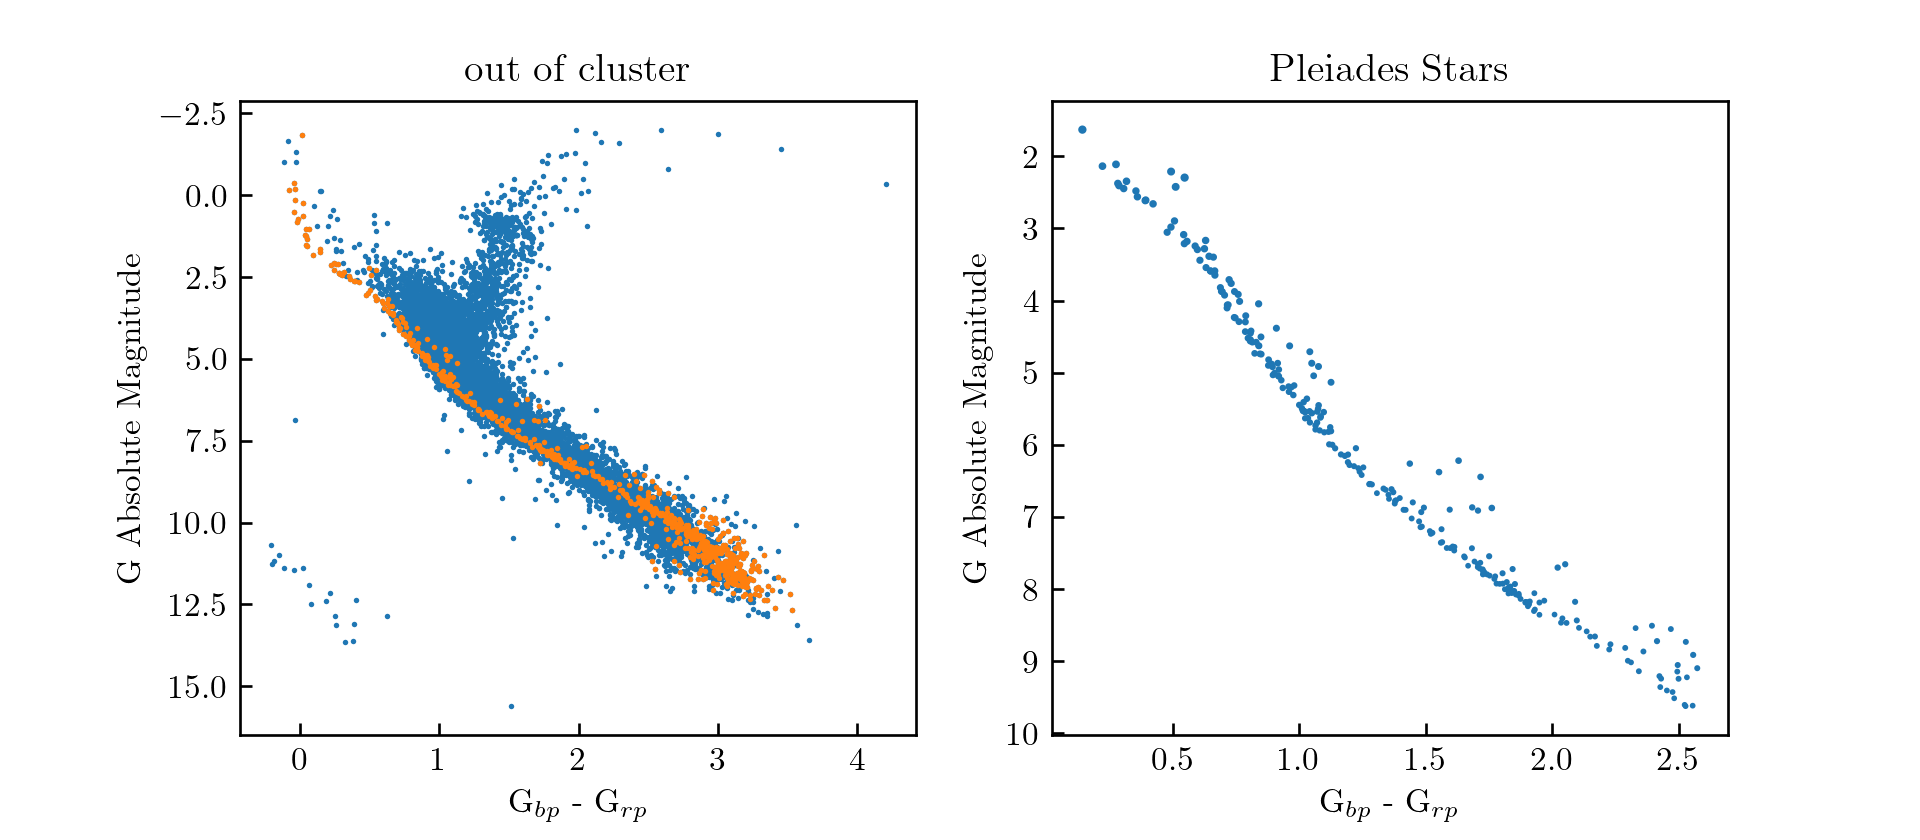

In [64]:
def get_absolute_mag(apparent_magnitude, parallax):
    """ This function calculates the absolute magnitude from the apparent
    magnitude and the astrometric parallax
    
    Parameters
    ----------
    apparent_magnitude : float (mag)
        The apparent magnitude of the star. This can be in any band
        
    parallax : float (mas)
        The astrometric parallax of the star.
        
    Returns
    -------
    absolute_magnitude : float
        The absolute magnitude of the star
    """
    
    absolute_magnitude = apparent_magnitude - 5*numpy.log10(1e2/parallax)
    
    return absolute_magnitude


fig, subs = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), dpi=120)

subs[0].set_title("out of cluster")
subs[1].set_title("Pleiades Stars")
# Your code here!

absolute_magnitudes = get_absolute_mag(gaia_m45_data["phot_g_mean_mag"], gaia_m45_data["parallax"])
colors = gaia_m45_data["phot_bp_mean_mag"] - gaia_m45_data["phot_rp_mean_mag"]

subs[0].scatter(colors, absolute_magnitudes, s=0.4)
subs[0].scatter(colors[pleiades], absolute_magnitudes[pleiades], s=0.4)

subs[1].scatter(colors[pleiades], absolute_magnitudes[pleiades], s=gaia_m45_data["radius_val"][pleiades])

for i in range(2):
    subs[i].set_xlabel("G$_{bp}$ - G$_{rp}$")
    subs[i].set_ylabel("G Absolute Magnitude")
    subs[i].invert_yaxis()
plt.show()

Before we explore the meaning behind these plots I ask that you really try and think about the following questions. Don't worry if you don't know the answer because I have intentionally left the vital information out. Put your best guess or questions that you have while thinking and feel free to discuss with others!

- **Now that you have created a color magnitude diagram (CMD), what trends can you identify in the data? Compare and contrast the two CMDs for stars in the cluster and those not associated with the cluster.**

- **How are magnitude and color corelated?**

- **What might it mean for a star to be redder or bluer?**

- **Do you see any outliers in the data from stars outside of the cluster?**


If you are curious you may see what other variables exist in the data that I havn't mentioned and make plots of your own! For example, try adding the `radius_val` as the size for scatter points in the CMD above!

<br>

<div class="alert alert-info" role="alert">
<strong>Bonus</strong>: Perform the steps of Exercise 1 again but with another 2 clusters using the data files "gaia_NGC-2682-result.csv" and "gaia_NGC-2360-result.csv". Create a CMD comparing the Pleiades to the stars in another cluster. What differences can you find?
</div>


In [75]:
gaia_ngc2682_data = pd.read_csv("gaia_NGC-2682-result.csv", delimiter = "," )
gaia_ngc2682_data.columns

Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmdec', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp', 'radial_velocity',
       'radial_velocity_error', 'phot_variable_flag', 'teff_val', 'a_g_val',
       'radius_val', 'lum_val'],
      dtype='object')

<IPython.core.display.Javascript object>


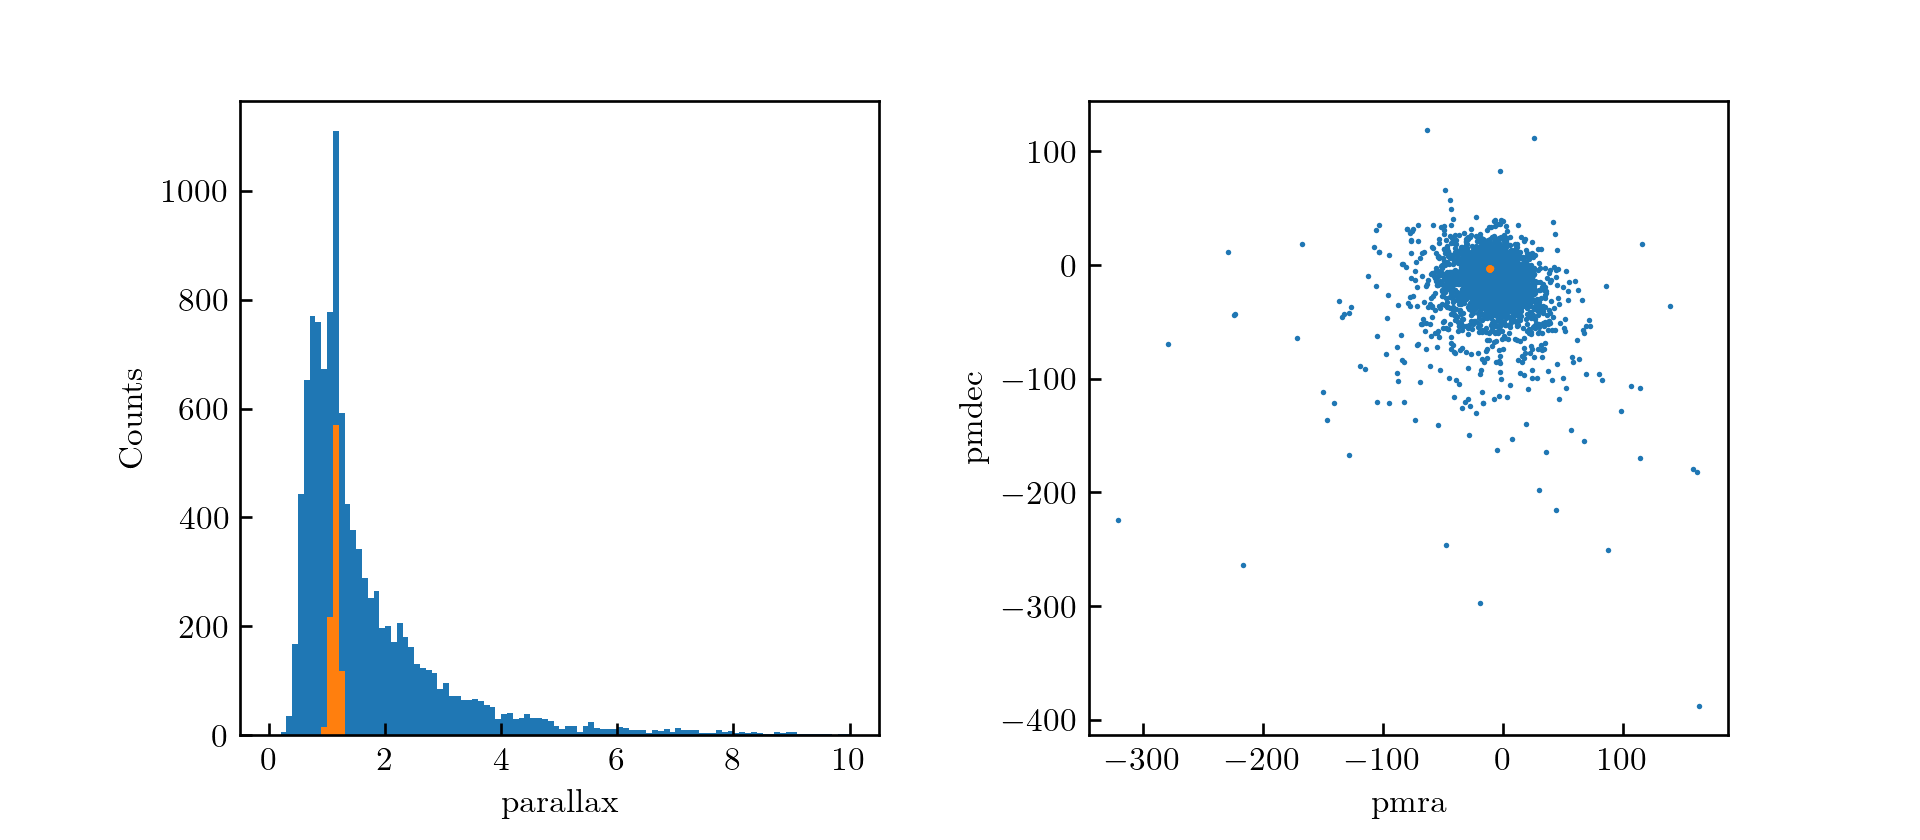

In [76]:
import numpy

fig, subs = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), dpi=120)

ngc2682_par = numpy.logical_and(0.9 < gaia_ngc2682_data["parallax"], gaia_ngc2682_data["parallax"] < 1.3)
ngc2682_pmra = numpy.logical_and(-11.6 < gaia_ngc2682_data["pmra"], gaia_ngc2682_data["pmra"] < -10.4)
ngc2682_pmdec = numpy.logical_and(-3.5 < gaia_ngc2682_data["pmdec"], gaia_ngc2682_data["pmdec"] < -2.5)

ngc2682 = numpy.logical_and(ngc2682_par, ngc2682_pmra)
ngc2682 = numpy.logical_and(ngc2682, ngc2682_pmdec)

subs[0].hist(gaia_ngc2682_data["parallax"], bins=100, range=(0,10) )
subs[0].hist(gaia_ngc2682_data["parallax"][ngc2682], bins=100, range=(0,10))

subs[0].set_xlabel("parallax")
subs[0].set_ylabel("Counts")

subs[1].scatter(gaia_ngc2682_data["pmra"], gaia_ngc2682_data["pmdec"], s=0.4 )
subs[1].scatter(gaia_ngc2682_data["pmra"][ngc2682], gaia_ngc2682_data["pmdec"][ngc2682], s=0.4)

subs[1].set_xlabel("pmra")
subs[1].set_ylabel("pmdec")

fig.subplots_adjust(wspace=0.33)
plt.show()

<IPython.core.display.Javascript object>


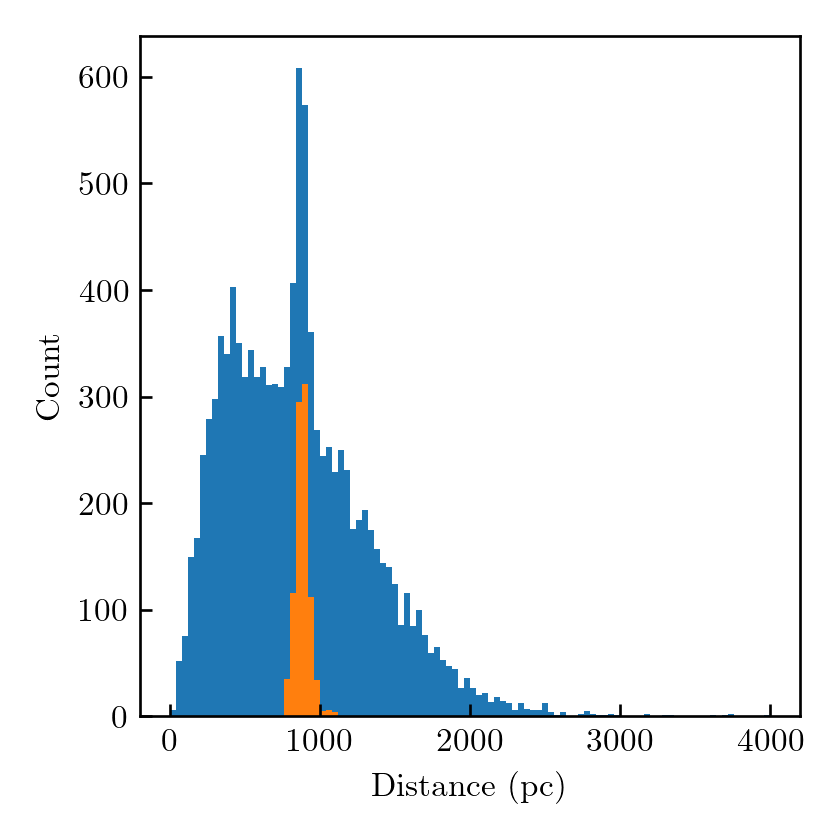

In [63]:
# A histogram of distance also helps

distance = 1./(gaia_ngc2682_data["parallax"]*1e-3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.hist(distance, bins=100, range=(0,4000))
ax.hist(distance[ngc2682], bins=100, range=(0,4000))

ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Count")

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


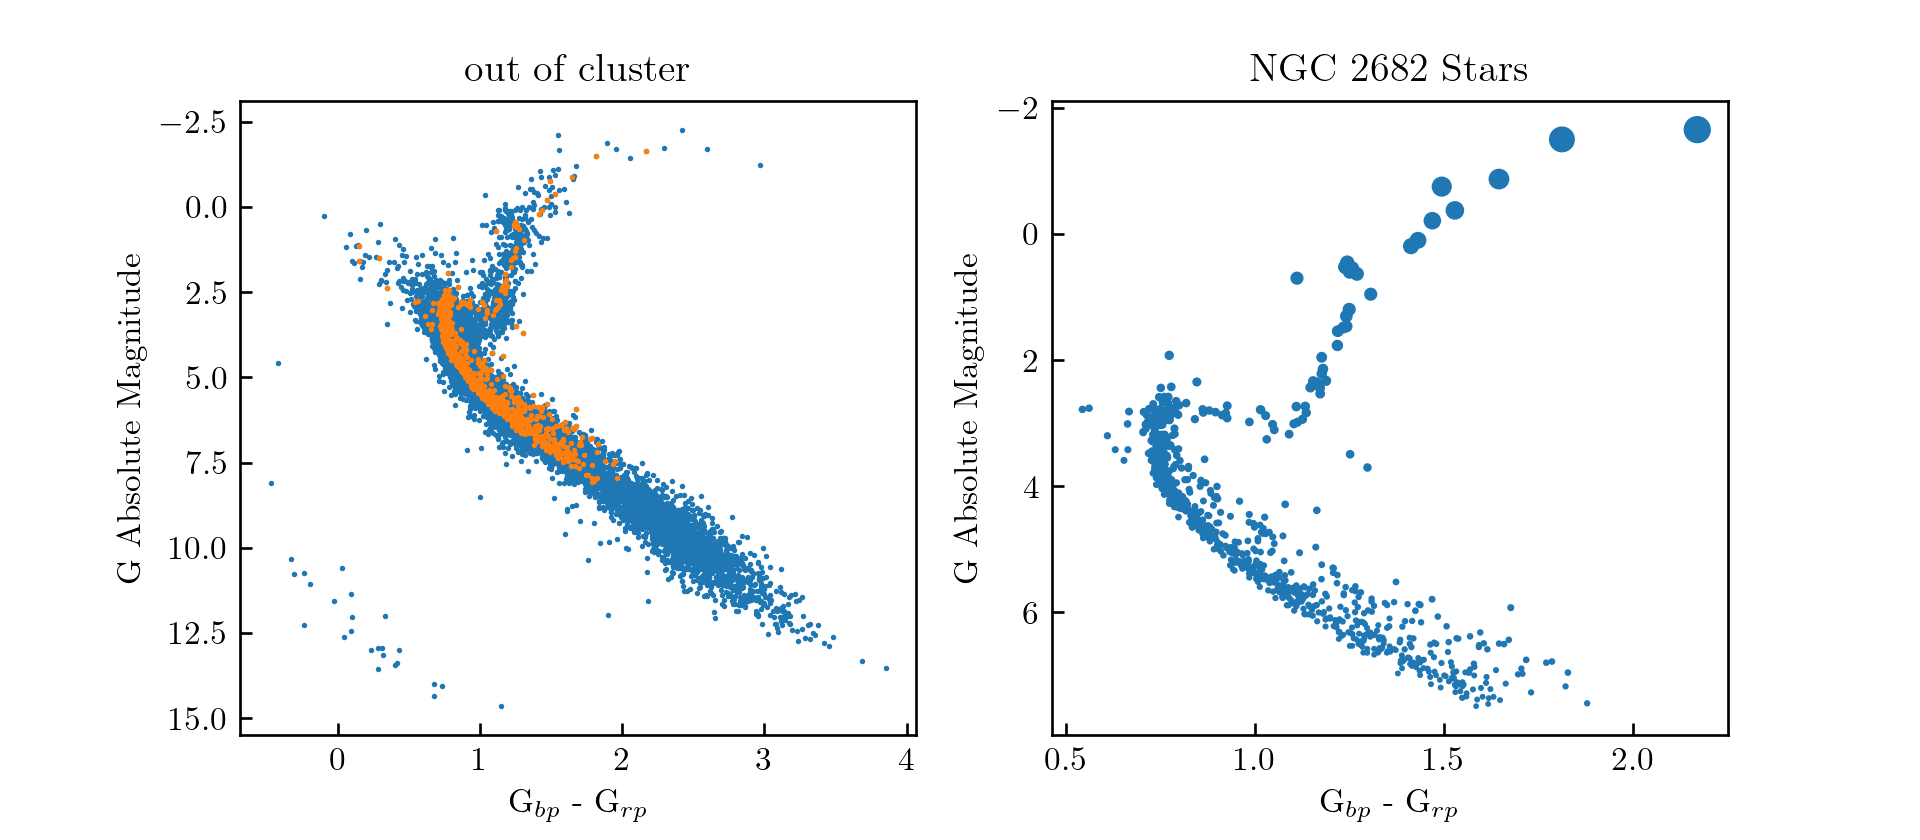

In [66]:
fig, subs = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), dpi=120)

subs[0].set_title("out of cluster")
subs[1].set_title("NGC 2682 Stars")
# Your code here!

absolute_magnitudes = get_absolute_mag(gaia_ngc2682_data["phot_g_mean_mag"], gaia_ngc2682_data["parallax"])
colors = gaia_ngc2682_data["phot_bp_mean_mag"] - gaia_ngc2682_data["phot_rp_mean_mag"]

subs[0].scatter(colors, absolute_magnitudes, s=0.4)
subs[0].scatter(colors[ngc2682], absolute_magnitudes[ngc2682], s=0.4)

subs[1].scatter(colors[ngc2682], absolute_magnitudes[ngc2682], s=gaia_ngc2682_data["radius_val"][ngc2682])

for i in range(2):
    subs[i].set_xlabel("G$_{bp}$ - G$_{rp}$")
    subs[i].set_ylabel("G Absolute Magnitude")
    subs[i].invert_yaxis()
plt.show()

In [78]:
gaia_ngc2360_data = pd.read_csv("gaia_NGC-2360-result.csv", delimiter = "," )
gaia_ngc2360_data.columns

Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmdec', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp', 'radial_velocity',
       'radial_velocity_error', 'phot_variable_flag', 'teff_val', 'a_g_val',
       'radius_val', 'lum_val'],
      dtype='object')

<IPython.core.display.Javascript object>


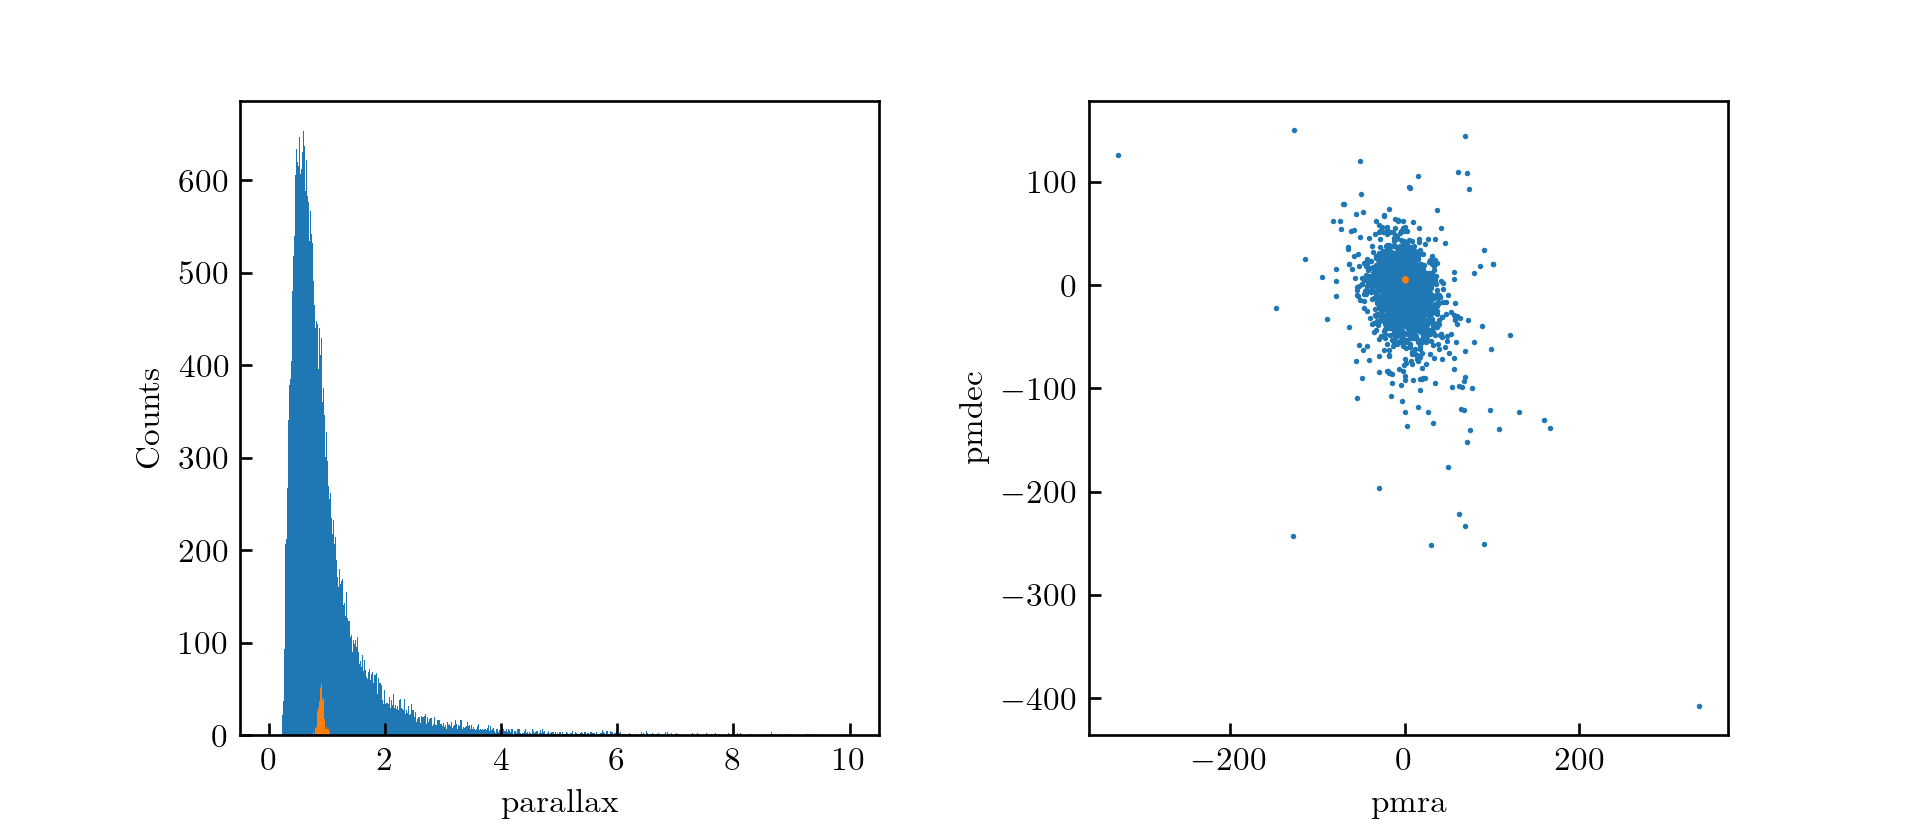

In [79]:
import numpy

fig, subs = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), dpi=120)

ngc2360_par = numpy.logical_and(0.75 < gaia_ngc2360_data["parallax"], gaia_ngc2360_data["parallax"] < 1.1)
ngc2360_pmra = numpy.logical_and(-0. < gaia_ngc2360_data["pmra"], gaia_ngc2360_data["pmra"] < 0.8)
ngc2360_pmdec = numpy.logical_and(5.25 < gaia_ngc2360_data["pmdec"], gaia_ngc2360_data["pmdec"] < 6.0)

ngc2360 = numpy.logical_and(ngc2360_par, ngc2360_pmra)
ngc2360 = numpy.logical_and(ngc2360, ngc2360_pmdec)

subs[0].hist(gaia_ngc2360_data["parallax"], bins=1000, range=(0,10) )
subs[0].hist(gaia_ngc2360_data["parallax"][ngc2360], bins=1000, range=(0,10))

subs[0].set_xlabel("parallax")
subs[0].set_ylabel("Counts")

subs[1].scatter(gaia_ngc2360_data["pmra"], gaia_ngc2360_data["pmdec"], s=0.4 )
subs[1].scatter(gaia_ngc2360_data["pmra"][ngc2360], gaia_ngc2360_data["pmdec"][ngc2360], s=0.4)

subs[1].set_xlabel("pmra")
subs[1].set_ylabel("pmdec")

fig.subplots_adjust(wspace=0.33)
plt.show()

<IPython.core.display.Javascript object>


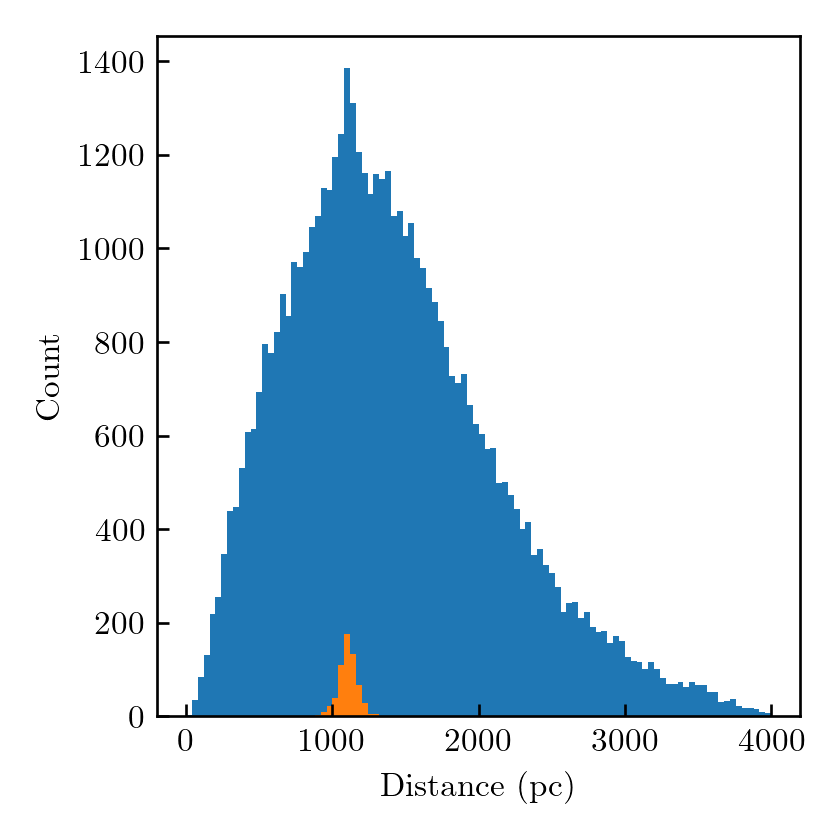

In [78]:
# A histogram of distance also helps

distance = 1./(gaia_ngc2360_data["parallax"]*1e-3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3.5), dpi=120)

ax.hist(distance, bins=100, range=(0,4000))
ax.hist(distance[ngc2360], bins=100, range=(0,4000))

ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Count")

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


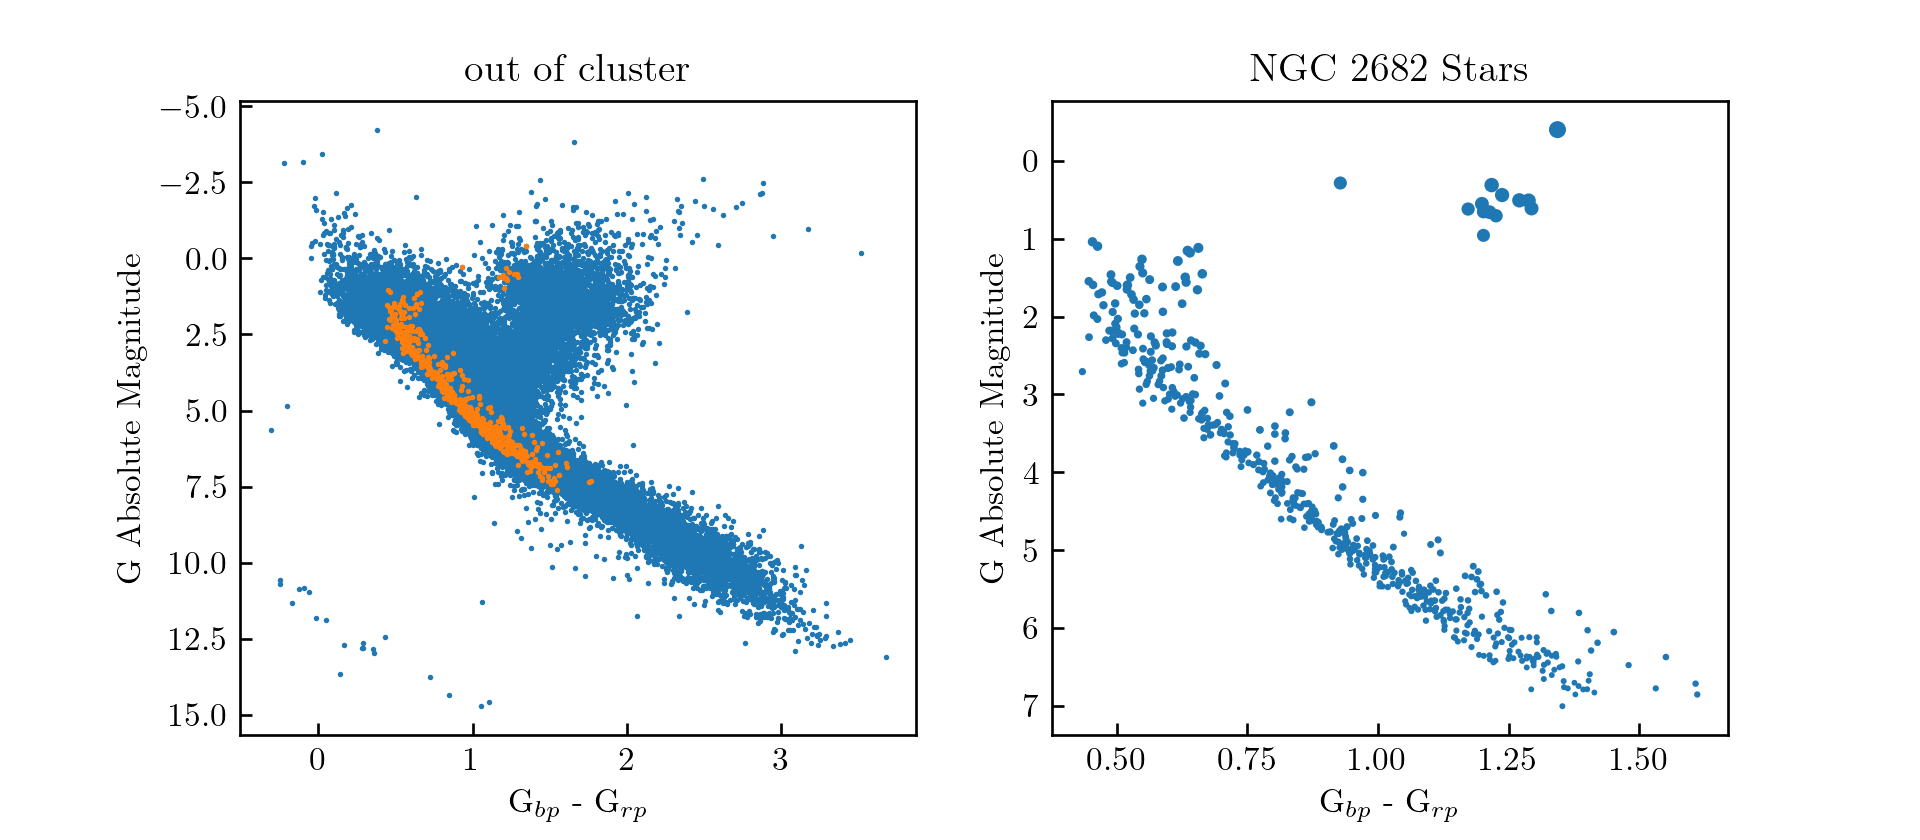

In [79]:
fig, subs = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), dpi=120)

subs[0].set_title("out of cluster")
subs[1].set_title("NGC 2682 Stars")
# Your code here!

absolute_magnitudes = get_absolute_mag(gaia_ngc2360_data["phot_g_mean_mag"], gaia_ngc2360_data["parallax"])
colors = gaia_ngc2360_data["phot_bp_mean_mag"] - gaia_ngc2360_data["phot_rp_mean_mag"]

subs[0].scatter(colors, absolute_magnitudes, s=0.4)
subs[0].scatter(colors[ngc2360], absolute_magnitudes[ngc2360], s=0.4)

subs[1].scatter(colors[ngc2360], absolute_magnitudes[ngc2360], s=gaia_ngc2360_data["radius_val"][ngc2360])

for i in range(2):
    subs[i].set_xlabel("G$_{bp}$ - G$_{rp}$")
    subs[i].set_ylabel("G Absolute Magnitude")
    subs[i].invert_yaxis()
plt.show()

-------------

## Exercise 2: Stellar Evolution Theory with MIST models

[MIST models](http://waps.cfa.harvard.edu/MIST/index.html) are data files produced from the stellar evolution code Modules for Experiments in Stellar Astrophysics (MESA). MESA is an open source software available for anyone to download and use that numerically simulates stellar evolution. The data conatins a few of the star's properties at many times throughout its life allowing us to track how different variables change.

Unlike observational data, we have precise information about everything going on in the star. However, our precise information is based off of how we *model* stars which is generally different from how they work in real life. For example, MESA models a star in 1 dimension but we know stars are sperical and they exist in 3D. These and many other simplifications are made to maximise scientific accuracy while allowing the simulations to run in a reasonable amount of time.


__(a.) Load in the solar (like our sun) MIST model `00100M.track.eep`. Make plots of `log_L`, `log_Teff`, and `log_R` as a function of `star_age`. Use log scale in the x axis (e.g. `plt.xscale('log')`). You can also plot other variables (mass, central temperature, central abundances, etc.) and explore the data!__

- Notice how much the star's luminoisty and radius change as it evolves.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mist_file = "modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep"
mist_solar_model = pd.read_csv( mist_file, comment="#", delim_whitespace=True, 
                             names=np.loadtxt(mist_file,max_rows=1,skiprows=11,comments=None,dtype=str)[1::] )
mist_solar_model.columns

Index(['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass',
       'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ',
       'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z',
       'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16',
       'v_wind_Km_per_s', 'surf_avg_omega_crit',
       'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit',
       'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf',
       'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7',
       'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13',
       'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20',
       'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32',
       'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T',
       'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma',
       'mass_conv_core', 'center_h1', 'center_he4', 'center_c12', 'center_n14',
       'center_o16

If you are wondering what some of these variables are, feel free to look at the `README_tables.pdf` that gives units and very short descriptions.

<IPython.core.display.Javascript object>


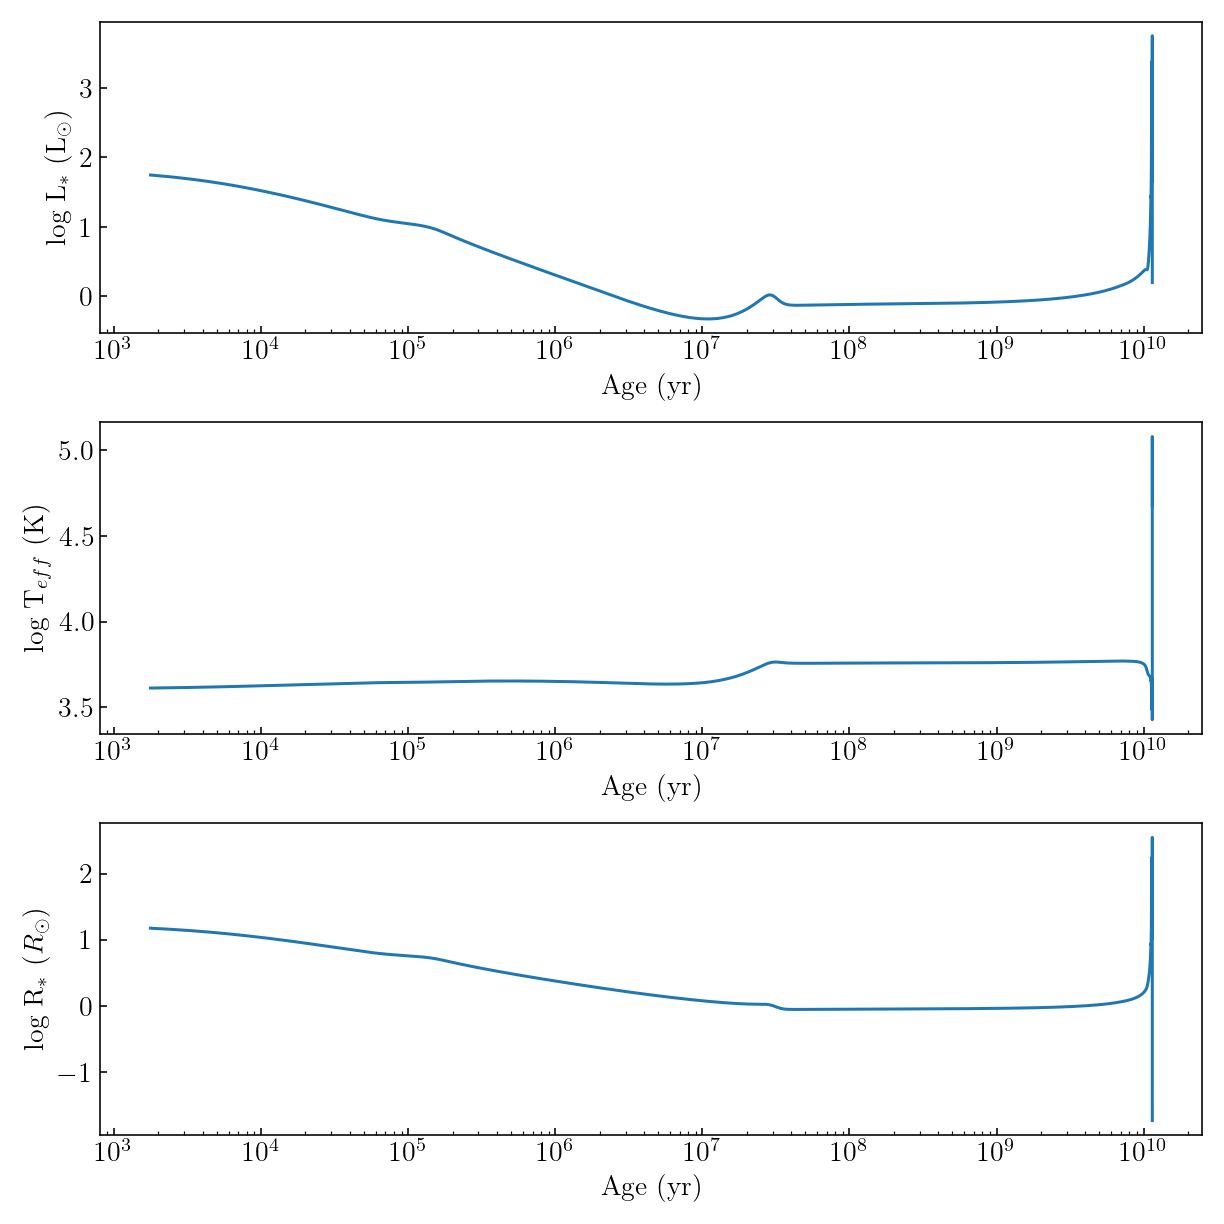

In [14]:
%matplotlib inline
%matplotlib notebook

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8.5,8.5))

ax[0].plot(mist_solar_model["star_age"], mist_solar_model["log_L"], "-")
ax[1].plot(mist_solar_model["star_age"], mist_solar_model["log_Teff"], "-")
ax[2].plot(mist_solar_model["star_age"], mist_solar_model["log_R"], "-")

for i in range(3):
    ax[i].set_xscale('log')
    ax[i].tick_params('both', labelsize=14)
    
for i in range(3):
    ax[i].set_xlabel("Age (yr)", fontsize=14)
    
ax[0].set_ylabel("$\log$ L$_{*}$ (L$_{\odot}$)", fontsize=14)
ax[1].set_ylabel("$\log$ T$_{eff}$ (K)", fontsize=14)
ax[2].set_ylabel("$\log$ R$_{*}$ ($R_{\odot}$)", fontsize=14)
    
fig.tight_layout()

__(b.) Watch [this video](https://www.youtube.com/watch?v=4xIQGbYur9Q) about stellar evolution to learn about the different stages a star goes through! Don't worry about understanding every detail. If you have questions about anything in the video let me know!__

Here are a few takeaways I would like to highlight from the video:
- Stars are responsible for the synthesis of many heavy elements.
- A star's evolution is linked closely to its initial mass.
- Stars with different masses live and go through evolution at different rates.
- Stellar deaths produce some of the most extreme systems in the universe: white dwarfs, neutron stars, black holes, and supernovae!



__(c.) Find at least 3 of the following stages of stellar evolution in the solar type MIST model by looking at each stage's description and using the plots from before as a guide. You should find the index in the arrays that corresponds to each stage of evolution (or the time when the stage occurs). Mark the stages of stellar evolution as points on your plots (e.g. `plt.scatter()`).__

1. Pre-Main-Sequence (PreMS):
    - This is where the MIST models start! The stellar models start as a cloud of gas collapsing under gravity. The central temperature $T_c$ and central density $\rho_c$ both increase as the star contracts. Although $T_c$, $\rho_c$ are extreme compared to quantities we encounter here on earth, they are not high enough to cause atoms to fuse together just yet.
    
    
2. Zero Age Main Sequence (ZAMS): 
    - ZAMS is when the core temperature and density rise high enough for hydrogen fusion to begin. Hydorgen fusion in the core generates thermal energy which provides pressure support pushing out against gravity, halting the collapse.
    - Both $\rho_c$, $T_c$ stop changing and remain stable during the MS. You will also see that the central hydrogen abundance just begins to decrease. _Note: ZAMS is the beginning of the MS so try and find the first time hydogren fusion begins!_
    
    
3. Terminal Age Main Sequence (TAMS):
    - The MS ends at the TAMS when central hydrogen has been burned through fusion into helium. This may leave a core of helium surrounded by a layer of hydrogen. You can find this part of the evolution by looking at the central abundance of hydrogen which should be depleted. You may also plot the central abundance of helium and see how it relates to the central abundance of hydrogen as a function of time.
    

4. Red Giant Branch Tip (RGBtip):
    - After a star ends the MS phase, it has converted its core of hydrogen into helium. However, the helium is not burning yet because $\rho_c$, $T_c$ are not high enough to begin helium fusion. The hydrogen sitting ontop of the helium is hot enough to fuse and so fusion occurs in a shell around the core while the core contracts. Then the star will start to expand into its giant phase characterized by a sharp increase in luminoisty and radius and a modest decrease in effective temperature.
    - This point may be hard to find! Don't worry if you can't find it 100% correct. If you are trying you may want to plot just the end of the evolution of the star after ~1.1e10 years.
    
    
5. White Dwarf Cooling Sequence (WDCS):
    - A WD is the final stage of evolution for a solar type star. WDs are very dense objects that are made of mostly carbon and oxygen (or sometimes oxygen and neon). They do not fuse elements in their core to support themselves from gravitaitonal collapse. Electron degeneracy pressure provides the support they need meaning these objects are theoretically stable for the age of the universe if left undisturbed.


<div class="alert alert-info" role="alert">
<strong>Bonus</strong>: Calculate the time between ZAMS and TAMS or the Main Sequence Lifetime and compare it to the total lifetime of the star.
</div>

TAMS - ZAMS =  9.964867224617638 billion years
Total lifetime =  11.465471475297027 billion years


<IPython.core.display.Javascript object>


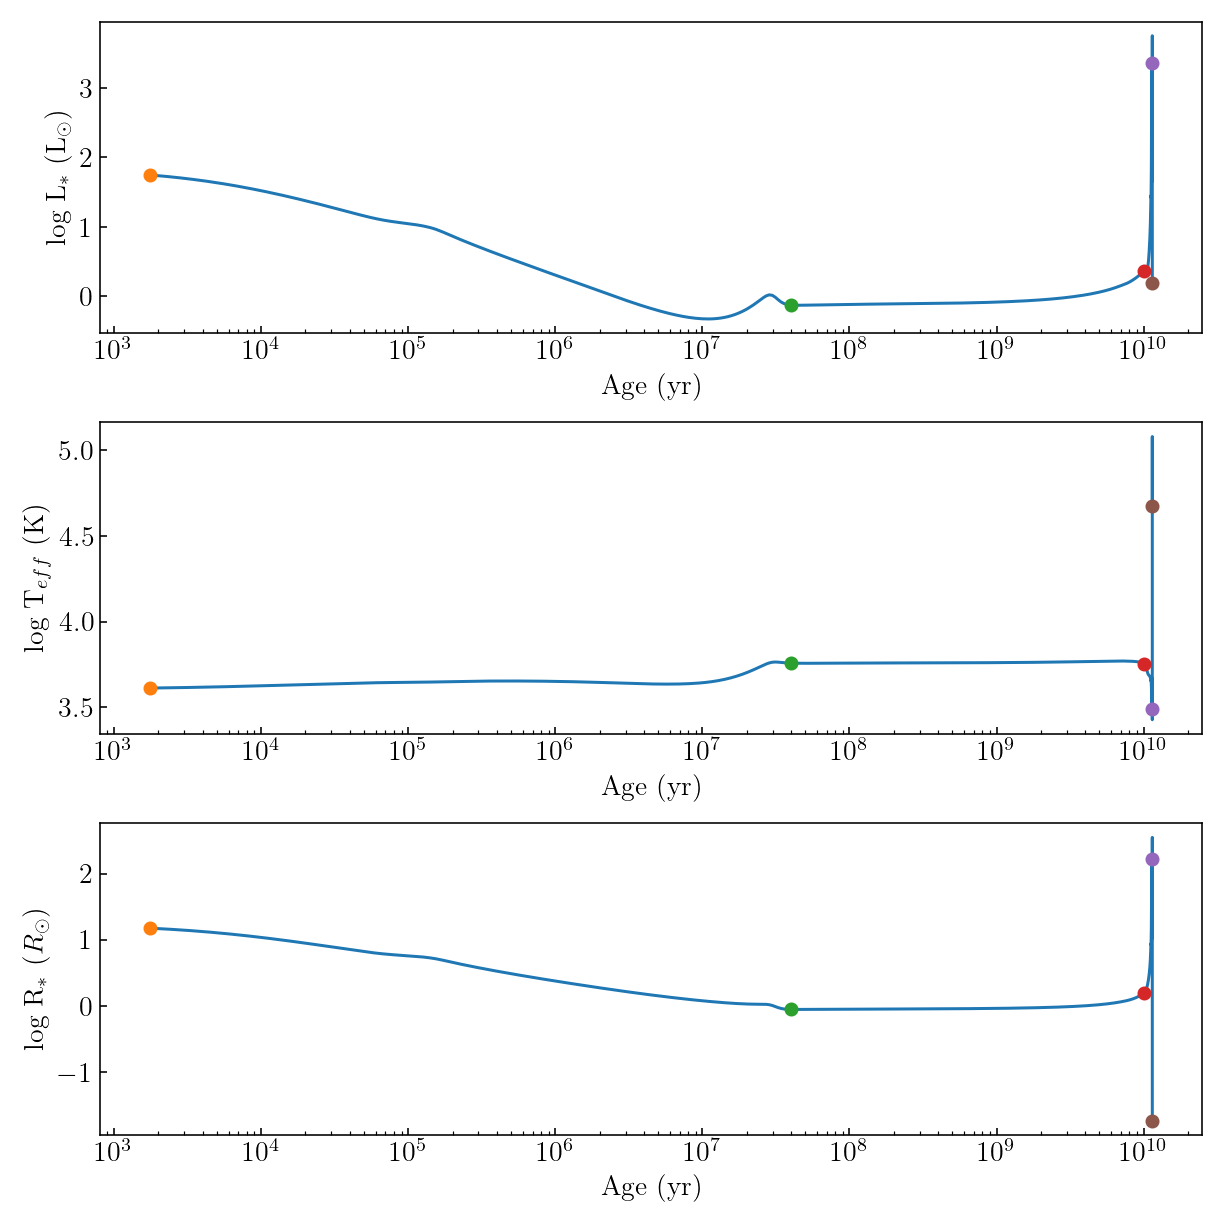

In [35]:
def find_nearest_index(array, value):
    """Given an array and a floating point number value
    find the index of the element closest to the value.
    
    Parameters
    ----------
    array : array
        Numpy array to search in.
    value : float
        A floating point number compared 
        with valid entries in the array.
        
    Returns
    -------
    loc_where_min : int
        Index in array of item closest to value.
    """
    abs_diff = np.abs( array - value )
    loc_where_min = np.argmin( abs_diff )
    return loc_where_min

PreMS_index = find_nearest_index(mist_solar_model["star_age"], 1.0e3)
ZAMS_index = find_nearest_index(mist_solar_model["star_age"], 4.0e7)
TAMS_index = find_nearest_index(mist_solar_model["star_age"], 1.0e10)
RGBtip_index = find_nearest_index(mist_solar_model["star_age"], 1.1336e10)
WDCS_index = find_nearest_index(mist_solar_model["star_age"], mist_solar_model["star_age"].max())

print("TAMS - ZAMS = ", (mist_solar_model["star_age"][TAMS_index] - mist_solar_model["star_age"][ZAMS_index])/1e9, "billion years")
print("Total lifetime = ", mist_solar_model["star_age"].max()/1e9, "billion years")

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8.5,8.5))

ax[0].plot(mist_solar_model["star_age"], mist_solar_model["log_L"], "-")
ax[1].plot(mist_solar_model["star_age"], mist_solar_model["log_Teff"], "-")
ax[2].plot(mist_solar_model["star_age"], mist_solar_model["log_R"], "-")

for i, key in enumerate(["log_L","log_Teff","log_R"]):
    ax[i].plot(mist_solar_model["star_age"][PreMS_index], mist_solar_model[key][PreMS_index], "o", label="PreMS")
    ax[i].plot(mist_solar_model["star_age"][ZAMS_index], mist_solar_model[key][ZAMS_index], "o", label="ZAMS")
    ax[i].plot(mist_solar_model["star_age"][TAMS_index], mist_solar_model[key][TAMS_index], "o", label="TAMS")
    ax[i].plot(mist_solar_model["star_age"][RGBtip_index], mist_solar_model[key][RGBtip_index], "o", label="RGBtip")
    ax[i].plot(mist_solar_model["star_age"][WDCS_index], mist_solar_model[key][WDCS_index], "o", label="WDCS")

for i in range(3):
    ax[i].set_xscale('log')
    ax[i].tick_params('both', labelsize=14)
    
for i in range(3):
    ax[i].set_xlabel("Age (yr)", fontsize=14)
    
ax[0].set_ylabel("$\log$ L$_{*}$ (L$_{\odot}$)", fontsize=14)
ax[1].set_ylabel("$\log$ T$_{eff}$ (K)", fontsize=14)
ax[2].set_ylabel("$\log$ R$_{*}$ ($R_{\odot}$)", fontsize=14)
    
fig.tight_layout()

__(d.) Plot a Hertzsprung-Russell Diagram (HRD) of the solar MIST model. An HRD plot has $T_{\rm eff}$ as the x axis and $L$ as the y axis (usually in log). Flip the x axis so that effective temperature increases to the left. Plot the stages of stellar evolution you have indentified from part c on the same plot. You should get something that looks like the image below.__

<img src="HRD-1msun.png" >

<IPython.core.display.Javascript object>


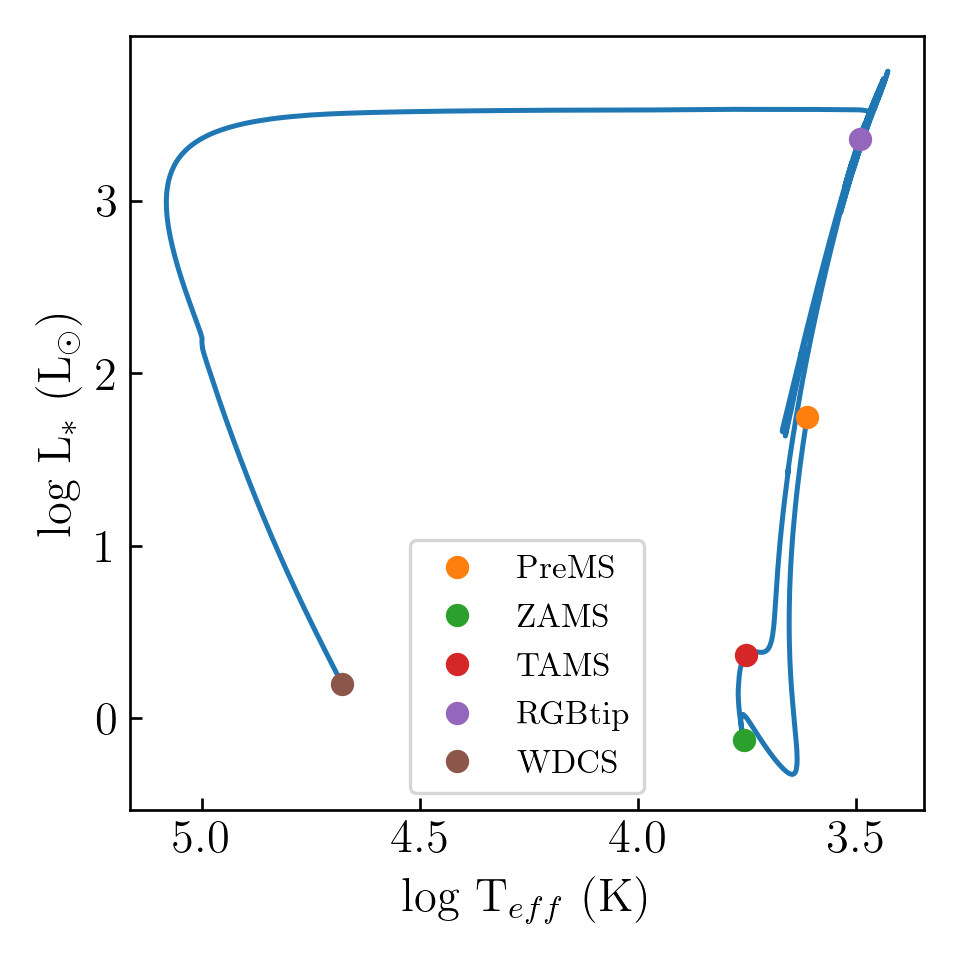

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.0,4.0), dpi=120)

ax.plot(mist_solar_model["log_Teff"], mist_solar_model["log_L"], "-")

ax.plot(mist_solar_model["log_Teff"][PreMS_index], mist_solar_model["log_L"][PreMS_index], "o", label="PreMS")
ax.plot(mist_solar_model["log_Teff"][ZAMS_index], mist_solar_model["log_L"][ZAMS_index], "o", label="ZAMS")
ax.plot(mist_solar_model["log_Teff"][TAMS_index], mist_solar_model["log_L"][TAMS_index], "o", label="TAMS")
ax.plot(mist_solar_model["log_Teff"][RGBtip_index], mist_solar_model["log_L"][RGBtip_index], "o", label="RGBtip")
ax.plot(mist_solar_model["log_Teff"][WDCS_index], mist_solar_model["log_L"][WDCS_index], "o", label="WDCS")

ax.set_xlabel("$\log$ T$_{eff}$ (K)", fontsize=14)
ax.set_ylabel("$\log$ L$_{*}$ (L$_{\odot}$)", fontsize=14)

ax.invert_xaxis()

ax.legend(loc="lower center")

ax.tick_params("both", labelsize=14)

fig.tight_layout()

Now we are going to look at the properties of multiple stars but at different times in their evolution. Below I have sorted some of the data that I want you to use for this exercise.

__(e.) For each MIST model, find the $L$, $T_{\rm eff}$, and $M$ at the specified ages and plot each star as a point on an HRD scatter plot. Make the size of each point related to the star's mass (you can scale it up if the points are small). The stars should form a line at the first age (close to the main sequence). What do you notice about how the stars change as they age? Which stars change the most and what happens to the main sequence of stars at late times?__

In [41]:
import numpy
import os

AGES = [2e7, 1e8, 3.5e8, 9e8, 1e10 ] #years
all_files = os.listdir("modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS")
all_files.sort()
good_mist_files = [f for f in all_files if "eep" in f][0:-10]
# These are the files I want you to use
print( good_mist_files )

masses = []
lstars = []
teffs = []

for age in AGES:
    print(age)
    
    masses.append([])
    lstars.append([])
    teffs.append([])
    
    for file_name in good_mist_files:
        rnd_path = "modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/" + file_name
        rnd_data = pd.read_csv( rnd_path, comment="#", delim_whitespace=True, 
                names=np.loadtxt(rnd_path, max_rows=1, skiprows=11, comments=None, dtype=str)[1::] )
        
        age_index = find_nearest_index(rnd_data["star_age"], age)
        
        masses[-1].append(rnd_data["star_mass"][age_index])
        lstars[-1].append(rnd_data["log_L"][age_index])
        teffs[-1].append(rnd_data["log_Teff"][age_index])
        
masses = numpy.array(masses)
lstars = numpy.array(lstars)
teffs = numpy.array(teffs)
    
print("DONE")

['00050M.track.eep', '00060M.track.eep', '00070M.track.eep', '00080M.track.eep', '00090M.track.eep', '00092M.track.eep', '00094M.track.eep', '00096M.track.eep', '00098M.track.eep', '00100M.track.eep', '00110M.track.eep', '00120M.track.eep', '00130M.track.eep', '00140M.track.eep', '00150M.track.eep', '00160M.track.eep', '00170M.track.eep', '00180M.track.eep', '00190M.track.eep', '00200M.track.eep', '00210M.track.eep', '00220M.track.eep', '00230M.track.eep', '00240M.track.eep', '00250M.track.eep', '00260M.track.eep', '00270M.track.eep', '00280M.track.eep', '00300M.track.eep', '00320M.track.eep', '00340M.track.eep', '00360M.track.eep', '00380M.track.eep', '00400M.track.eep', '00500M.track.eep', '00600M.track.eep', '00700M.track.eep', '00800M.track.eep']
20000000.0
100000000.0
350000000.0
900000000.0
10000000000.0
(5, 38)
DONE


<IPython.core.display.Javascript object>


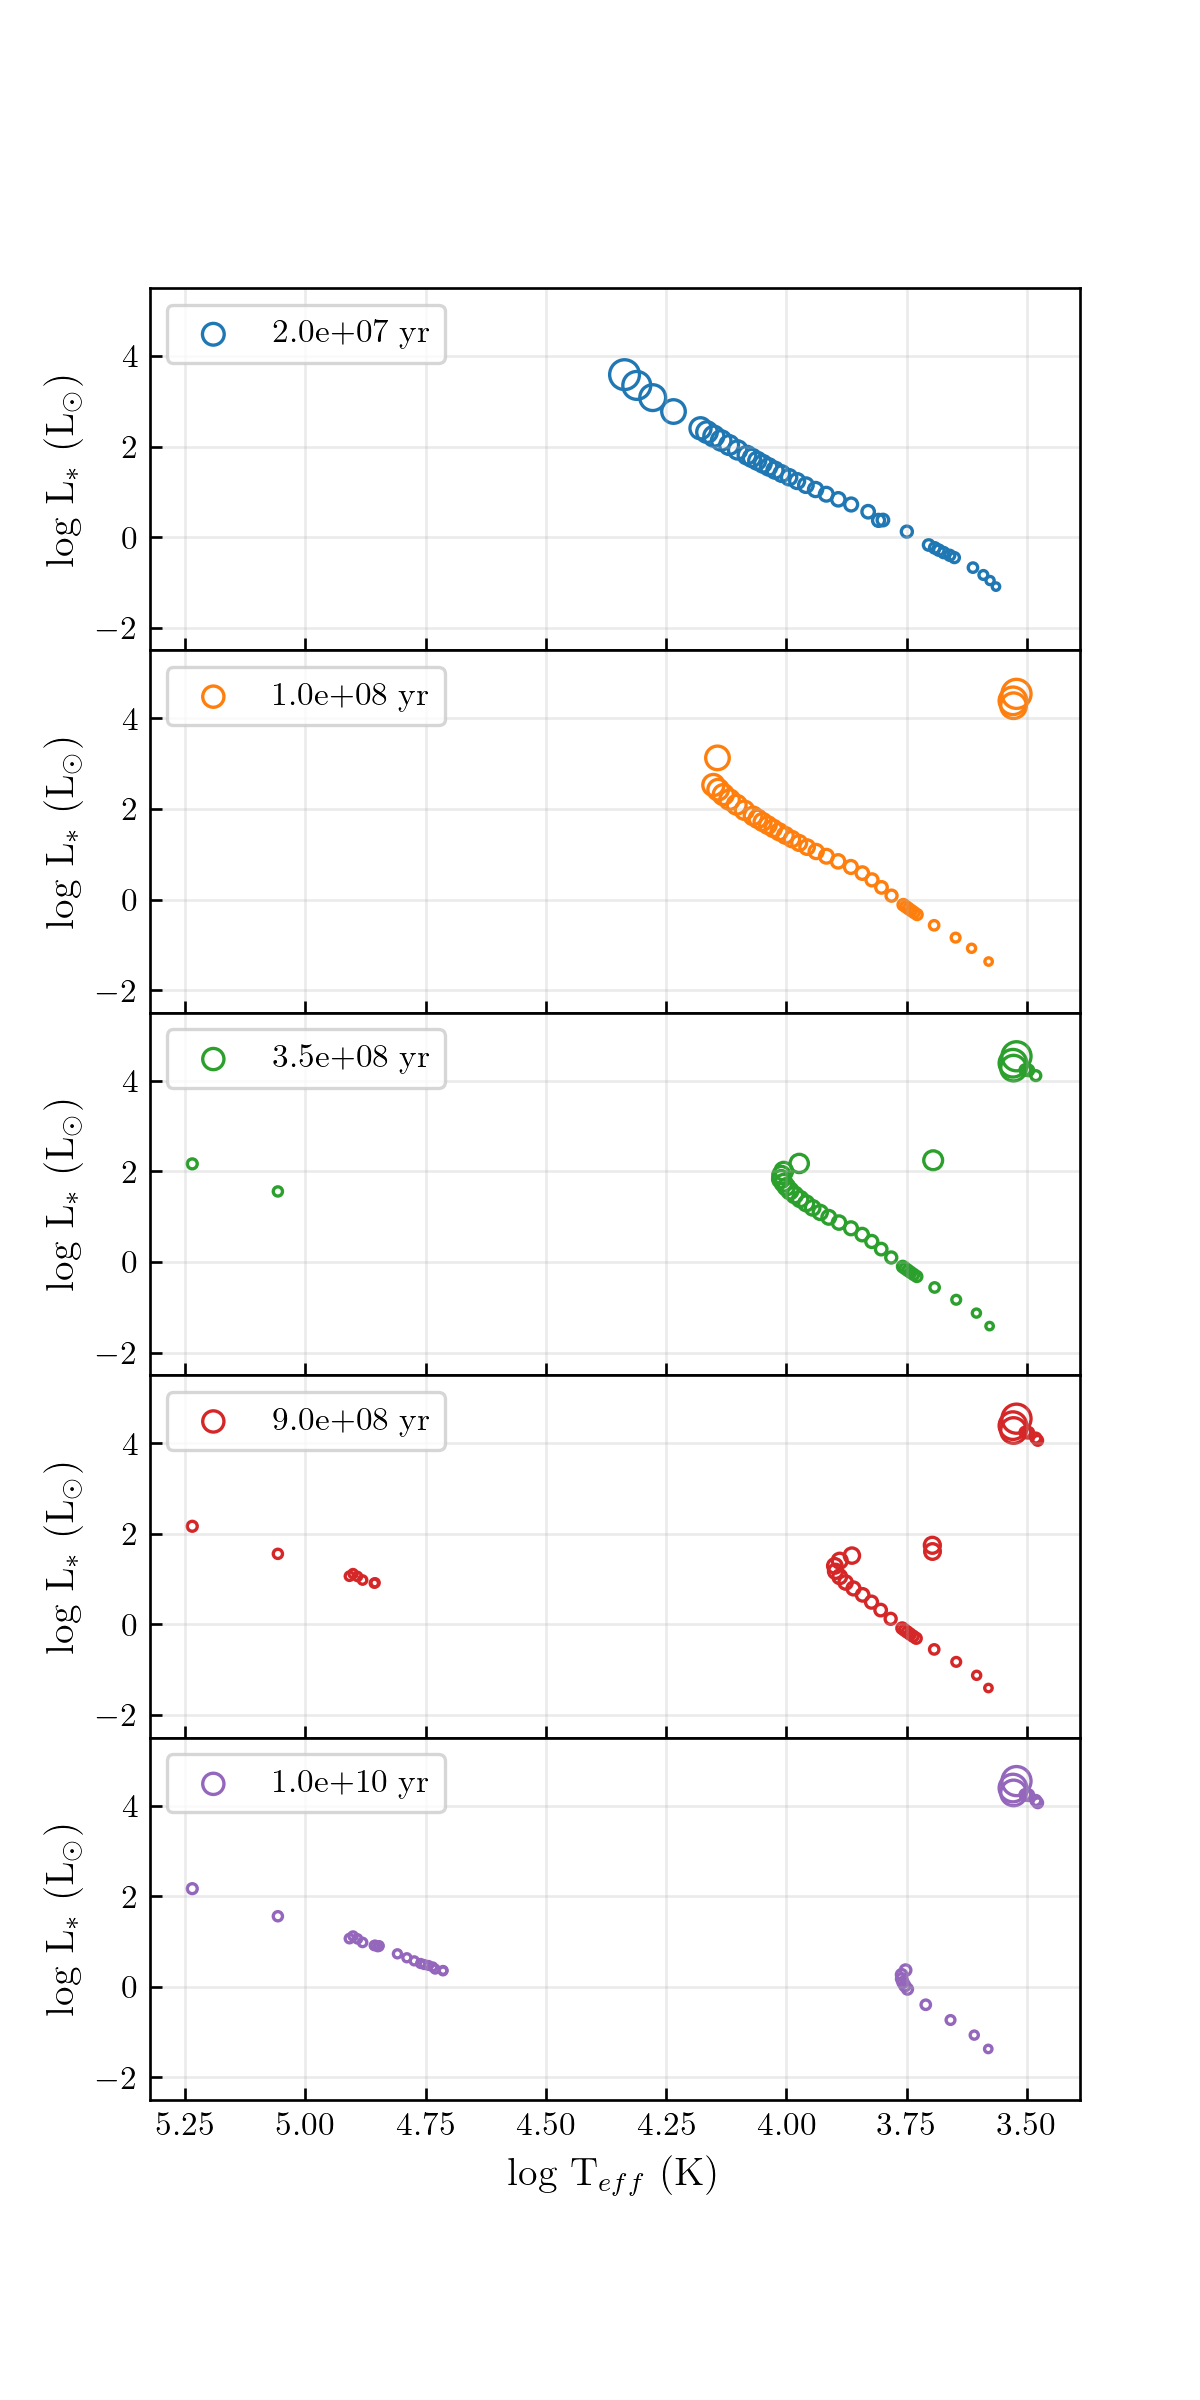

In [49]:
# Replace YOUR_TEFF_ARRAY, YOUR_LOGL_ARRAY, and YOUR_MASS_ARRAY!

# 'sharex=True' allows the plots to all have the same x axis range
fig, subs = plt.subplots( nrows=len(AGES), ncols=1, sharex=True, dpi=120, figsize=(5,10) )

for i, age in enumerate(AGES):
    subs[i].scatter(teffs[i], lstars[i], label="{:.1e} yr".format(AGES[i]), s = masses[i]*10, 
            marker="o", facecolors="none", edgecolor="C"+str(i) )
    
    subs[i].set_ylabel("$\log$ L$_{*}$ (L$_{\odot}$)", fontsize=12)
    subs[i].grid(alpha=0.25)
    subs[i].legend(loc='upper left')
    subs[i].set_ylim(-2.5, 5.5)

subs[-1].set_xlabel("$\log$ T$_{eff}$ (K)", fontsize=12)
subs[-1].invert_xaxis()
fig.subplots_adjust(hspace=0)
plt.show()

<div class="alert alert-info" role="alert">
    <h4 class="alert-heading"> Bonus: Estimating Ages of Star Clusters </h4>
  <p> <strong>(a.)</strong> First you must write code to plot a MIST track and the GAIA data on the same HR diagram. To do this you will need to use the "teff_val" and "lum_val" given in the GAIA data. You will also need to make sure all the data are in the same units between MIST and GAIA!</p>
  <p> <strong>(b.)</strong> Next you will change the stellar track you are plotting to match the cluster data. I have added code that marks the ZAMS location in every track as a black star on the plot. For a given cluster, find a stellar track such that the ZAMS location of the track in the HRD is at the peak of the Main Sequence band of the stars in the cluster. Then calculate the MS lifetime of the track. (ZAMS is at index `201` in the tracks and TAMS is at index `453`) </p>
   <p> <strong>(c.)</strong> Now that you have the MS lifetime, this should be close to the age of the cluster. Check this by calculating $t_{\rm MS} / t_{\rm age}$ </p>

   <p> $$t_{\rm age}(\text{Pleiades}) = 75 - 150 \text{ million yrs} $$ </p>
    
   <p> $$t_{\rm age}(\text{NGC 2360}) = 2.2 \text{ billion yrs} $$ </p>

   <p> $$t_{\rm age}(\text{NGC 2682}) = 3.69 \text{ billion yrs} $$ </p>

<p> <strong>Why is it that $t_{\rm MS}$ is a good measure of the age of a cluster? Think about how a young cluster looks compared to an old cluster.</strong> </p>
</div>

<IPython.core.display.Javascript object>


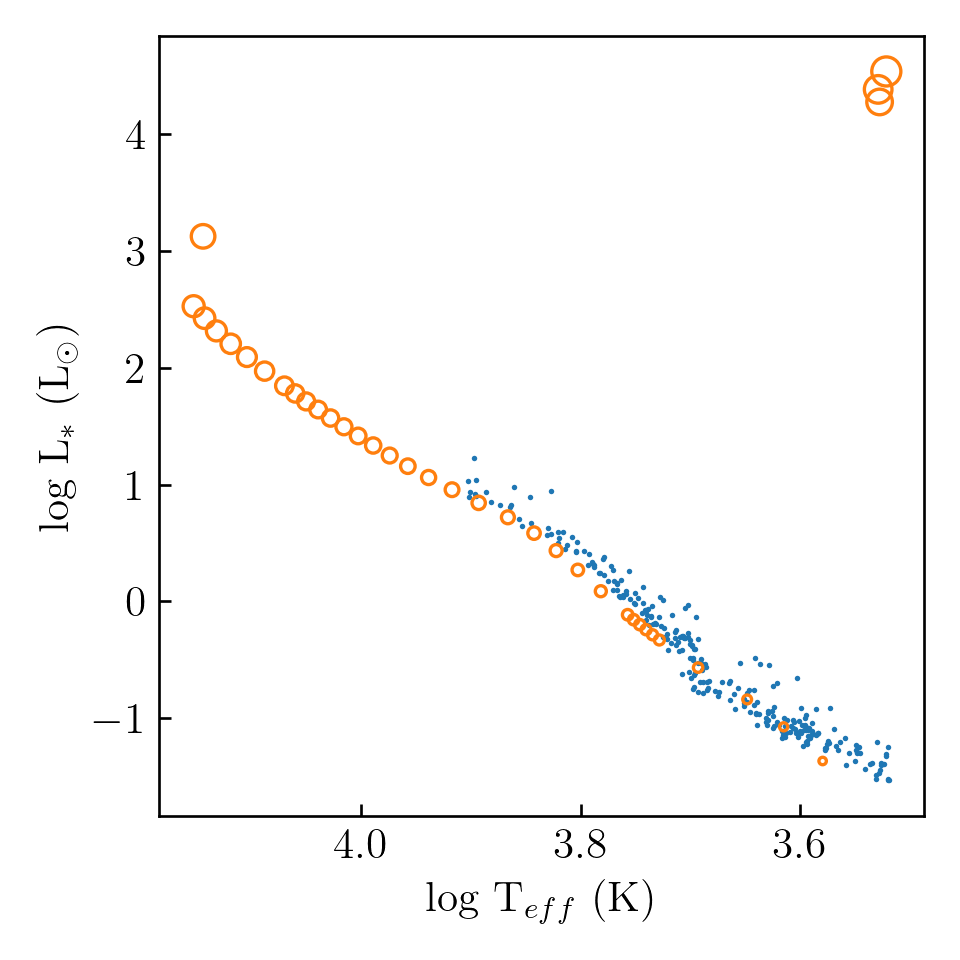

In [98]:
age = 1.0e8

all_files = os.listdir("modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS")
all_files.sort()
good_mist_files = [f for f in all_files if "eep" in f][0:-10]
# These are the files I want you to use

masses = []
lstars = []
teffs = []

for file_name in good_mist_files:
    rnd_path = "modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/" + file_name
    rnd_data = pd.read_csv( rnd_path, comment="#", delim_whitespace=True, 
            names=np.loadtxt(rnd_path, max_rows=1, skiprows=11, comments=None, dtype=str)[1::] )
        
    age_index = find_nearest_index(rnd_data["star_age"], age)
        
    masses.append(rnd_data["star_mass"][age_index])
    lstars.append(rnd_data["log_L"][age_index])
    teffs.append(rnd_data["log_Teff"][age_index])
        
masses = numpy.array(masses)
lstars = numpy.array(lstars)
teffs = numpy.array(teffs)

### Make an HR Diagram plot with both isochrones and data.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.0,4.0), dpi=120)

lstars_data = numpy.log10(gaia_m45_data["lum_val"])
teffs_data = numpy.log10(gaia_m45_data["teff_val"])

ax.scatter(teffs_data[pleiades], lstars_data[pleiades], s=0.4)

ax.scatter(teffs, lstars, label="{:.1e} yr".format(age), s = masses*10, 
            marker="o", facecolors="none", edgecolor="C1")

ax.set_xlabel("$\log$ T$_{eff}$ (K)", fontsize=13)
ax.set_ylabel("$\log$ L$_{*}$ (L$_{\odot}$)", fontsize=13)

ax.tick_params('both', labelsize=13)

ax.invert_xaxis()

fig.tight_layout()

<IPython.core.display.Javascript object>


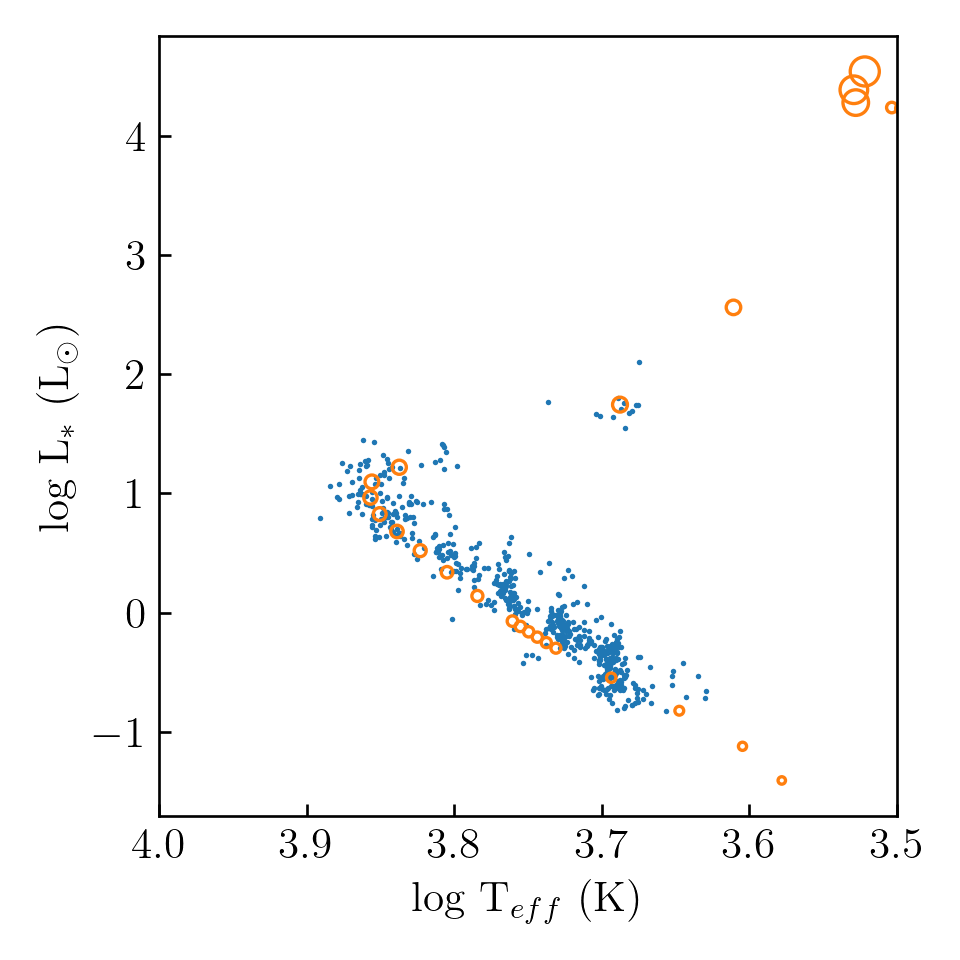

In [103]:
age = 1.3e9

all_files = os.listdir("modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS")
all_files.sort()
good_mist_files = [f for f in all_files if "eep" in f][0:-10]
# These are the files I want you to use

masses = []
lstars = []
teffs = []

for file_name in good_mist_files:
    rnd_path = "modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/" + file_name
    rnd_data = pd.read_csv( rnd_path, comment="#", delim_whitespace=True, 
            names=np.loadtxt(rnd_path, max_rows=1, skiprows=11, comments=None, dtype=str)[1::] )
        
    age_index = find_nearest_index(rnd_data["star_age"], age)
        
    masses.append(rnd_data["star_mass"][age_index])
    lstars.append(rnd_data["log_L"][age_index])
    teffs.append(rnd_data["log_Teff"][age_index])
        
masses = numpy.array(masses)
lstars = numpy.array(lstars)
teffs = numpy.array(teffs)

### Make an HR Diagram plot with both isochrones and data.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.0,4.0), dpi=120)

lstars_data = numpy.log10(gaia_ngc2360_data["lum_val"])
teffs_data = numpy.log10(gaia_ngc2360_data["teff_val"])

ax.scatter(teffs_data[ngc2360], lstars_data[ngc2360], s=0.4)

ax.scatter(teffs, lstars, label="{:.1e} yr".format(age), s = masses*10, 
            marker="o", facecolors="none", edgecolor="C1")

ax.set_xlim(3.5,4.0)

ax.set_xlabel("$\log$ T$_{eff}$ (K)", fontsize=13)
ax.set_ylabel("$\log$ L$_{*}$ (L$_{\odot}$)", fontsize=13)

ax.tick_params('both', labelsize=13)

ax.invert_xaxis()

fig.tight_layout()

<IPython.core.display.Javascript object>


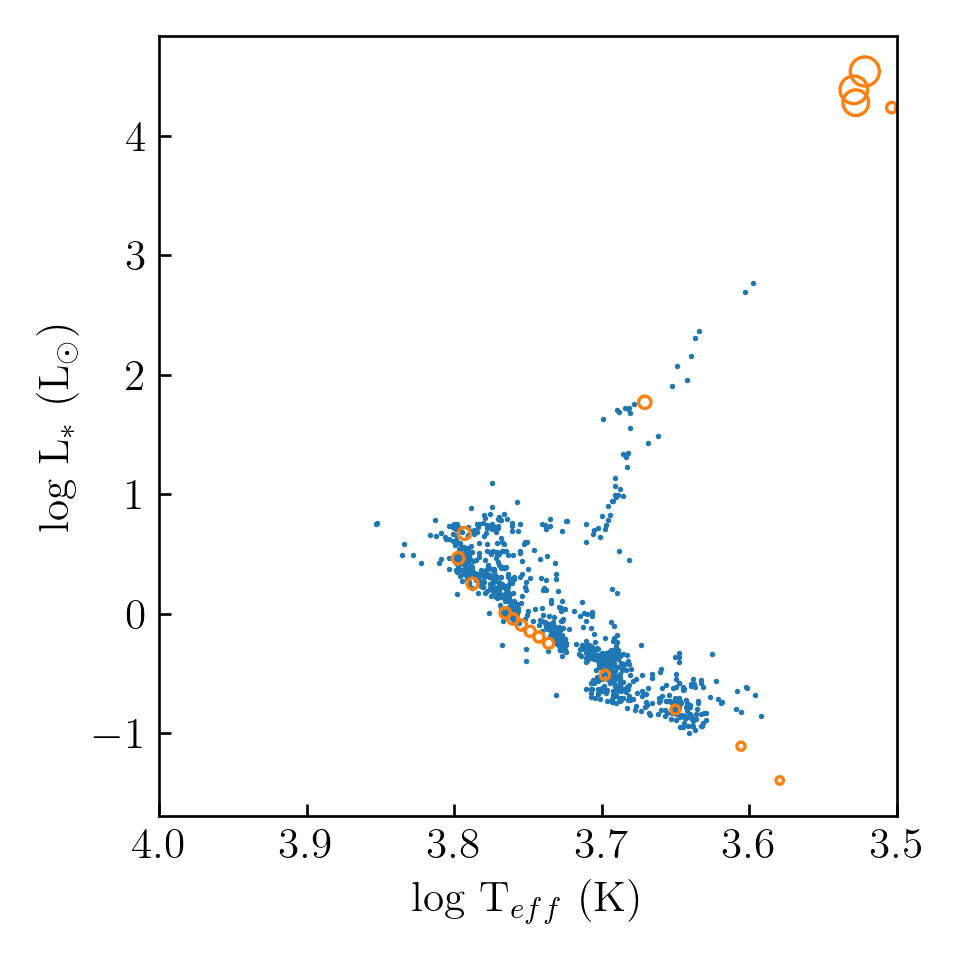

In [102]:
age = 3.6e9

all_files = os.listdir("modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS")
all_files.sort()
good_mist_files = [f for f in all_files if "eep" in f][0:-10]
# These are the files I want you to use

masses = []
lstars = []
teffs = []

for file_name in good_mist_files:
    rnd_path = "modified_MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/" + file_name
    rnd_data = pd.read_csv( rnd_path, comment="#", delim_whitespace=True, 
            names=np.loadtxt(rnd_path, max_rows=1, skiprows=11, comments=None, dtype=str)[1::] )
        
    age_index = find_nearest_index(rnd_data["star_age"], age)
        
    masses.append(rnd_data["star_mass"][age_index])
    lstars.append(rnd_data["log_L"][age_index])
    teffs.append(rnd_data["log_Teff"][age_index])
        
masses = numpy.array(masses)
lstars = numpy.array(lstars)
teffs = numpy.array(teffs)

### Make an HR Diagram plot with both isochrones and data.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.0,4.0), dpi=120)

lstars_data = numpy.log10(gaia_ngc2682_data["lum_val"])
teffs_data = numpy.log10(gaia_ngc2682_data["teff_val"])

ax.scatter(teffs_data[ngc2682], lstars_data[ngc2682], s=0.4)

ax.scatter(teffs, lstars, label="{:.1e} yr".format(age), s = masses*10, 
            marker="o", facecolors="none", edgecolor="C1")

ax.set_xlim(3.5,4.0)

ax.set_xlabel("$\log$ T$_{eff}$ (K)", fontsize=13)
ax.set_ylabel("$\log$ L$_{*}$ (L$_{\odot}$)", fontsize=13)

ax.tick_params('both', labelsize=13)

ax.invert_xaxis()

fig.tight_layout()

# Please only read if you are done with the lesson!

-----------------

## Summary 

You may have noticed that the color magnitude diagram and the HR diagram look very similar and this is because they are closely related. Absolute magnitude and luminoisty are both measuring the absolute brightness of a star. Color and effective temperature are related by the radiation physics of stars (if you are interested, we see that stars emit [black body radiation](https://en.wikipedia.org/wiki/Black-body_radiation)). The image below shows stars from the Hipparcos and Gliese Catalogue of nearby stars in a plot with axes of an HRD and CMD.


\![HRD_CMD](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png) Open this cell and remove \ to show image!


The final part of Exercise 2 is meant to show how stars of different masses evolve on different time scales. Higher mass stars evolve more quickly than low mass stars. If we considered a cluster of stars with many different masses ranging from low to high we might see the first plot in Exercise 2 (e.) where all the stars are still on the main sequence. However, at later times the massive stars have evolved and ended their lives as WDs while low mass stars are essentially unchanged and still on the main sequence. This behavior is known as the [**main sequence turn-off**](https://en.wikipedia.org/wiki/Turnoff_point). By finding the most massive star in a cluster still on the MS you can estimate the lifetime of the cluster!

\![turn-off](https://upload.wikimedia.org/wikipedia/commons/2/27/Open_cluster_HR_diagram_ages.gif) Open this cell and remove \ to show image!


##### Congratulations on making it to the end of this lesson! :) 